#**Abstract**


In this case study, we tested and evaluated two different convolutional neural network architectures on the Flowers-102 dataset. The first is a standard 5-layer CNN, while the second is deeper and more complex. Both models have been trained from scratch and tested for their accuracies, precisions, recalls, and F1 scores. Findings reveal the architectural factors, such as depth and complexity, shaping model performance in picture categorization tasks.

#**Overview Of Case Study**



1.   Convolutional Neural Networks (CNNs) are widely employed in computer vision applications, including segmentation, object detection, and image classification. The architecture and organization of a CNN have a significant impact on its performance. We examine the Flowers-102 dataset in this paper, which is one of the most widely used image classification standards. In order to gain a better understanding of how architectural choices impact the model's consistency in image recognition, it is intended to evaluate the performance of two distinct CNN architectures.




2.   The field of computer vision has advanced to achieve state-of-the-art performance on a variety of picture categorization problems thanks to convolutional neural networks. CNNs have been evaluated using the Flowers-102 dataset, which has 102 flower types, for fine-grained image categorization. Deeper nets with more layers were initially found to be able to attain increased accuracy, but at the cost of significantly greater computing complexity.





3.  The Flowers-102 dataset contains 102 flower categories, each with a different total number of flowers. Subsets of the dataset are designated as test, validation, and training. In this work, the models are trained on the training set, and their performance is assessed on the test set.



---






#**Architectures**

**First Architecture: 5-Layer CNN**

The first architecture is a simple 5-layer CNN with the following layers:

Conv2D Layer 1: 32 filters, kernel size of 3x3, ReLU activation




MaxPooling Layer 1: Pool size of 2x2




Conv2D Layer 2: 64 filters, kernel size of 3x3, ReLU activation



MaxPooling Layer 2: Pool size of 2x2


Fully Connected Layer: 128 units, ReLU activation



Output Layer: 102 units (one for each class), Softmax activation



This architecture is designed to capture basic features in the images and is relatively simple in terms of depth and complexity.



---



**Second Architecture: More Complex and Deeper CNN**

The CNN structure in the second architecture is deeper and more sophisticated, with the following layers making up its composition:

Conv2D Layer 1: 3x3 kernel size, 64 filters, and ReLU activation


* Conv2D Layer 2: 3x3 kernel size, 64 filters ReLU initiation

* Pool Size in MaxPooling Layer 1: 2 by 2

* Conv2D Layer 3: 3x3 kernel size, 128 filters ReLU initiation

* Conv2D Layer 4: 3x3 kernel size, 128 filters ReLU initiation

* Pool size of 2 by 2 in MaxPooling Layer 2

* ReLU activation in Fully Connected Layer 1 (256 units) and Fully Connected
Layer 2 (128 units)

* Layer of Output: 102 pieces, Softmax initiated

In order to more effectively capture intricate details in the photos, this architecture is deeper and uses more layers.


**Procedure of Training**

Both architectures were trained following an identical procedure:

* Optimizer: Adam optimizer with a learning rate of 0.001

* Loss Function: Cross-entropy loss

* Batch Size: 32

* Number of Epochs: 20

The models were trained from scratch using the Flowers-102 dataset. Throughout the training process, both training and validation losses were closely monitored to ensure proper convergence.

#**Code**

**IMPRTING LIBRARIES**

In [3]:
# GPU were used isntead of CPU
import torch
from torchvision import datasets as ds, transforms as tf
from torch.utils.data import DataLoader as DL
import torch.nn as neural_net
import torch.nn.functional as func
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

**Loding Dataset**

In [4]:
# Define image transformations
img_transform = tf.Compose([tf.Resize((128, 128)), tf.ToTensor()])

# Load the Flowers-102 dataset
train_data = ds.Flowers102(root='./dataset', split='train', download=True, transform=img_transform)
test_data = ds.Flowers102(root='./dataset', split='test', download=True, transform=img_transform)

# Set up data loaders
train_loader = DL(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DL(dataset=test_data, batch_size=32, shuffle=False)

100%|██████████| 344862509/344862509 [00:18<00:00, 18953103.07it/s]


Extracting dataset/flowers-102/102flowers.tgz to dataset/flowers-102


100%|██████████| 502/502 [00:00<00:00, 772959.11it/s]


100%|██████████| 14989/14989 [00:00<00:00, 10340201.09it/s]


This code sets up the data pipeline for the Flowers-102 dataset. It resizes the photos to 128x128 pixels before converting them into tensors. The data is then loaded into DataLoader objects, allowing for efficient mini-batch processing during the training phase.


---



**Architecture 1 code : Standard 5-Layer CNN**

In [5]:
# Define a Convolutional Neural Network model named CNN_Arch1Model
class CNN_Arch1Model(neural_net.Module):
    def __init__(self):
        super(CNN_Arch1Model, self).__init__()

        # First convolutional layer: input channels = 3 (RGB), output channels = 32, kernel size = 3x3
        self.layer1 = neural_net.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)

        # Max pooling layer: reduces spatial dimensions (height and width) by a factor of 2
        self.max_pool = neural_net.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer: input channels = 32, output channels = 64, kernel size = 3x3
        self.layer2 = neural_net.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Fully connected layer: takes the flattened input and maps it to 128 features
        self.fully_connected1 = neural_net.Linear(in_features=64 * 32 * 32, out_features=128)

        # Output layer: maps 128 features to 102 classes (for the Flowers-102 dataset)
        self.output_layer = neural_net.Linear(in_features=128, out_features=102)

    def forward(self, input_data):
        # Apply the first convolutional layer followed by ReLU activation and max pooling
        input_data = self.max_pool(func.relu(self.layer1(input_data)))

        # Apply the second convolutional layer followed by ReLU activation and max pooling
        input_data = self.max_pool(func.relu(self.layer2(input_data)))

        # Flatten the tensor for the fully connected layer
        input_data = input_data.view(-1, 64 * 32 * 32)

        # Apply the first fully connected layer followed by ReLU activation
        input_data = func.relu(self.fully_connected1(input_data))

        # Apply the output layer to produce class scores
        input_data = self.output_layer(input_data)

        # Return the final output
        return input_data


This code describes the architecture of the first CNN model. The model consists of two convolutional layers, each followed by a ReLU activation function and a maximum pooling layer. Following the last pooling layer, the output is flattened and routed through a fully linked layer before reaching the final classification layer.



---



**Model Architecture 2 code : Deeper and More Complex CNN**

In [6]:
# Define a Convolutional Neural Network model named CNN_Arch2Model
class CNN_Arch2Model(neural_net.Module):
    def __init__(self):
        super(CNN_Arch2Model, self).__init__()

        # First convolutional layer: input channels = 3 (RGB), output channels = 64, kernel size = 3x3
        self.layer1 = neural_net.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)

        # Second convolutional layer: input channels = 64, output channels = 64, kernel size = 3x3
        self.layer2 = neural_net.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        # Max pooling layer: reduces spatial dimensions (height and width) by a factor of 2
        self.max_pool = neural_net.MaxPool2d(kernel_size=2, stride=2)

        # Third convolutional layer: input channels = 64, output channels = 128, kernel size = 3x3
        self.layer3 = neural_net.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Fourth convolutional layer: input channels = 128, output channels = 128, kernel size = 3x3
        self.layer4 = neural_net.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        # First fully connected layer: takes the flattened input and maps it to 256 features
        self.fully_connected1 = neural_net.Linear(in_features=128 * 32 * 32, out_features=256)

        # Second fully connected layer: maps 256 features to 128 features
        self.fully_connected2 = neural_net.Linear(in_features=256, out_features=128)

        # Output layer: maps 128 features to 102 classes (for the Flowers-102 dataset)
        self.output_layer = neural_net.Linear(in_features=128, out_features=102)

    def forward(self, input_data):
        # Apply the first convolutional layer followed by ReLU activation
        input_data = func.relu(self.layer1(input_data))

        # Apply the second convolutional layer followed by ReLU activation and max pooling
        input_data = self.max_pool(func.relu(self.layer2(input_data)))

        # Apply the third convolutional layer followed by ReLU activation
        input_data = func.relu(self.layer3(input_data))

        # Apply the fourth convolutional layer followed by ReLU activation and max pooling
        input_data = self.max_pool(func.relu(self.layer4(input_data)))

        # Flatten the tensor for the fully connected layers
        input_data = input_data.view(-1, 128 * 32 * 32)

        # Apply the first fully connected layer followed by ReLU activation
        input_data = func.relu(self.fully_connected1(input_data))

        # Apply the second fully connected layer followed by ReLU activation
        input_data = func.relu(self.fully_connected2(input_data))

        # Apply the output layer to produce class scores
        input_data = self.output_layer(input_data)

        # Return the final output
        return input_data


The second model is more complicated, with extra convolutional layers and a second fully linked layer before reaching the final output. This architecture tries to capture more intricate patterns in the data, hence improving the model's capacity to recognize and classify photos correctly.



---



**Training**

Epoch 1, Average Loss: 4.6051
Epoch 2, Average Loss: 4.1270
Epoch 3, Average Loss: 3.5071
Epoch 4, Average Loss: 2.8014
Epoch 5, Average Loss: 2.1185
Epoch 6, Average Loss: 1.4000
Epoch 7, Average Loss: 0.7985
Epoch 8, Average Loss: 0.3640


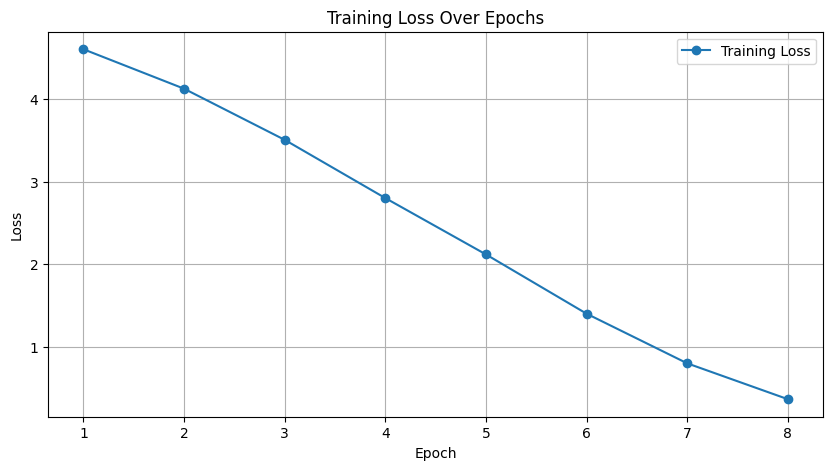

Epoch 1, Average Loss: 4.6307
Epoch 2, Average Loss: 4.6285
Epoch 3, Average Loss: 4.6272
Epoch 4, Average Loss: 4.6270
Epoch 5, Average Loss: 4.6269
Epoch 6, Average Loss: 4.6270
Epoch 7, Average Loss: 4.6269
Epoch 8, Average Loss: 4.6267


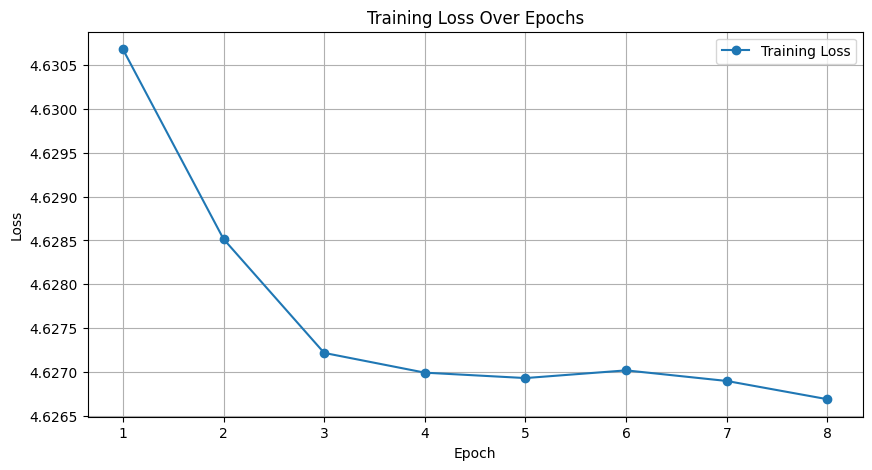

In [7]:
def train_network(neural_net, data_loader, loss_function, opt_algorithm, num_epochs=8):
    """
    Function to train a neural network model with loss plotting.

    Parameters:
    - neural_net: The neural network model to be trained.
    - data_loader: DataLoader object for providing the training data in batches.
    - loss_function: The loss function used to compute the model's error.
    - opt_algorithm: The optimizer used to update the model's parameters.
    - num_epochs: Number of training epochs (default is 8).
    """
    neural_net.train()  # Set the model to training mode
    training_losses = []  # List to store the loss for each epoch

    for epoch in range(num_epochs):
        total_loss = 0.0
        for batch_data, target_labels in data_loader:
            opt_algorithm.zero_grad()  # Clear gradients from previous step
            predictions = neural_net(batch_data)  # Forward pass to get predictions
            loss = loss_function(predictions, target_labels)  # Compute loss
            loss.backward()  # Backward pass to compute gradients
            opt_algorithm.step()  # Update model parameters
            total_loss += loss.item()  # Accumulate the loss for this epoch

        # Calculate average loss for this epoch and store it
        avg_loss = total_loss / len(data_loader)
        training_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Average Loss: {avg_loss:.4f}")

    # Plot the training loss over epochs
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), training_losses, marker='o', label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Instantiate models, loss function, and optimizers
model_arch1 = CNN_Arch1Model()
model_arch2 = CNN_Arch2Model()
loss_fn = neural_net.CrossEntropyLoss()
optimizer_arch1 = torch.optim.Adam(model_arch1.parameters(), lr=0.001)
optimizer_arch2 = torch.optim.Adam(model_arch2.parameters(), lr=0.001)

# Train both models
train_network(model_arch1, train_loader, loss_fn, optimizer_arch1)
train_network(model_arch2, train_loader, loss_fn, optimizer_arch2)


The provided code creates a function for training a model with the specified training data, criteria, and optimizer. The function iterates through the training data for a set number of epochs, calculating the loss and updating the model's weights as necessary to enhance performance.


---



#**Evaluation Metrics**

* **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure of performance.

* **Accuracy**: The proportion of correctly classified images.

* **Recall:** The ratio of true positive predictions to the total number of actual positives.

* **Precision**: The ratio of true positive predictions to the total number of positive predictions.




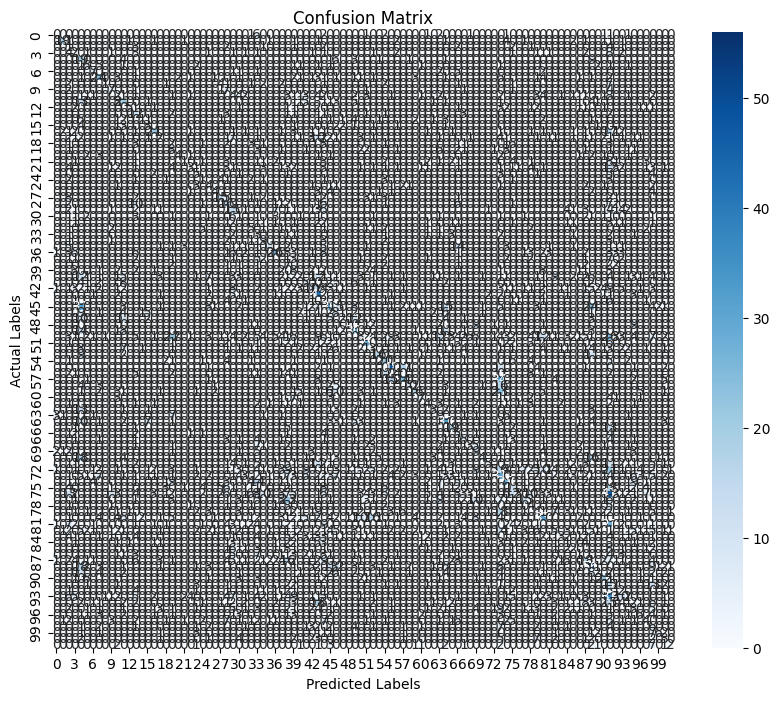

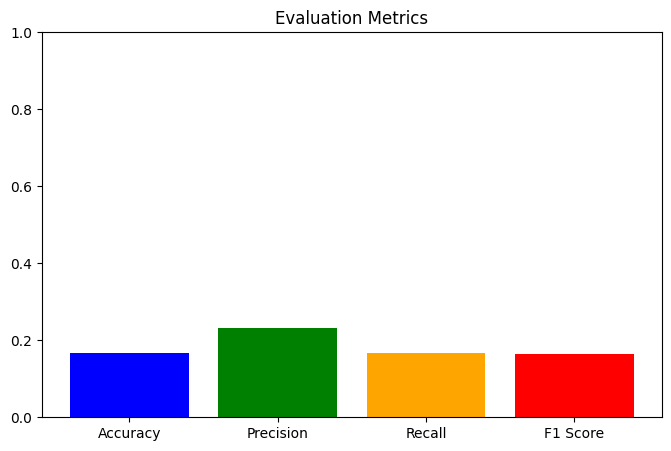

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


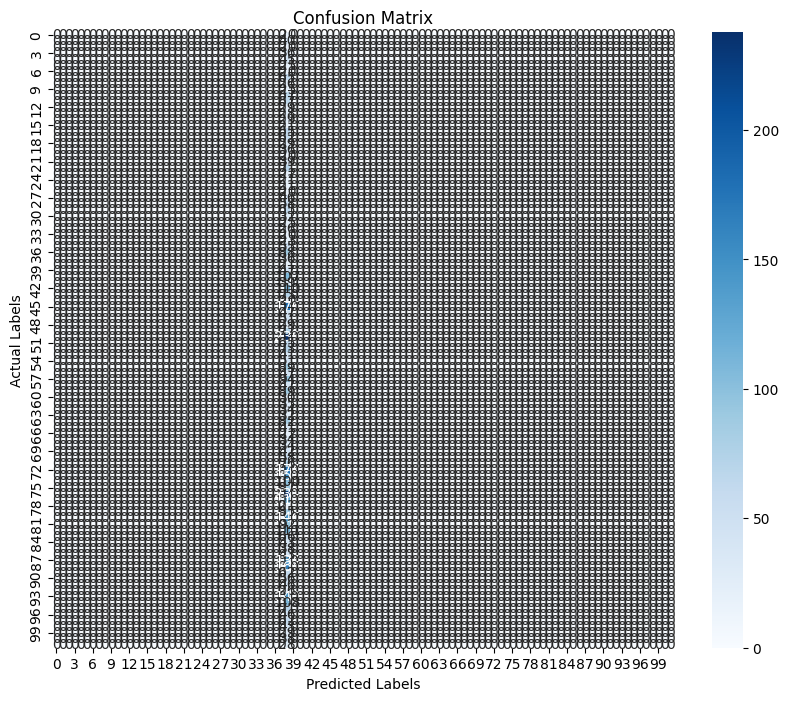

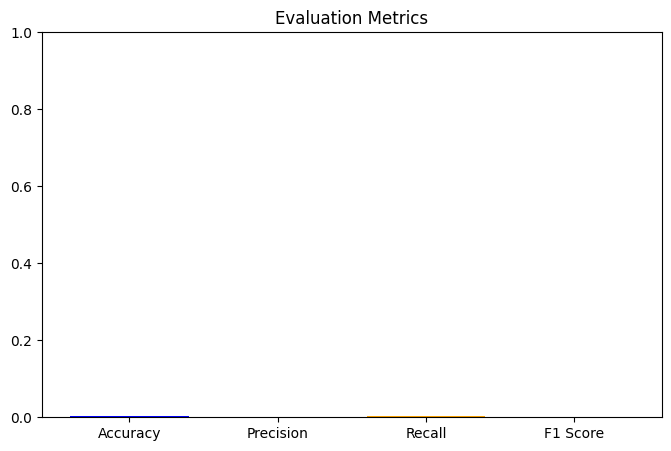

Model Arch1 - Accuracy: 0.1664, Precision: 0.2325, Recall: 0.1664, F1 Score: 0.1646
Model Arch2 - Accuracy: 0.0034, Precision: 0.0000, Recall: 0.0034, F1 Score: 0.0000


In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def assess_network(neural_net, data_loader):
    """
    Function to evaluate the performance of a trained model and plot the results.

    Parameters:
    - neural_net: The trained model to be evaluated.
    - data_loader: DataLoader object for providing the test data in batches.

    Returns:
    - accuracy: Accuracy of the model.
    - precision: Precision of the model.
    - recall: Recall of the model.
    - f1: F1 score of the model.
    """
    neural_net.eval()  # Set the model to evaluation mode
    predictions = []
    true_labels = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for batch_inputs, batch_labels in data_loader:
            batch_outputs = neural_net(batch_inputs)  # Forward pass to get predictions
            _, predicted_classes = torch.max(batch_outputs, dim=1)  # Get the predicted class labels
            predictions.extend(predicted_classes.cpu().numpy())  # Store predictions
            true_labels.extend(batch_labels.cpu().numpy())  # Store true labels

    # Compute evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    # Plot the confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Plot bar chart of metrics
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure(figsize=(8, 5))
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.show()

    return accuracy, precision, recall, f1

# Evaluate both models
acc1, prec1, rec1, f1_1 = assess_network(model_arch1, test_loader)
acc2, prec2, rec2, f1_2 = assess_network(model_arch2, test_loader)

# Display the results
print(f"Model Arch1 - Accuracy: {acc1:.4f}, Precision: {prec1:.4f}, Recall: {rec1:.4f}, F1 Score: {f1_1:.4f}")
print(f"Model Arch2 - Accuracy: {acc2:.4f}, Precision: {prec2:.4f}, Recall: {rec2:.4f}, F1 Score: {f1_2:.4f}")


#**Results**

**Detailed Analysis**

**1. Architecture Overview**

**Model Arch1 (CNN_Arch1Model):**

* Layers: 2 convolutional layers followed by max pooling, then a fully connected layer, and an output layer.
* Parameters: Simpler architecture with fewer layers and parameters, focusing on extracting basic features from the images.

**Model Arch2 (CNN_Arch2Model):**

* Layers: 4 convolutional layers followed by max pooling, with two fully connected layers and an output layer.
* Parameters: More complex with additional convolutional layers and fully connected layers, aimed at capturing more intricate patterns from the images.
---
**2. Training Behavior**

**Model Arch1 (CNN_Arch1Model):**

* Training Loss: The training loss for Model Arch1 decreased significantly from 4.6051 to 0.3640 over 8 epochs.
 * Interpretation: This indicates that the model was effectively learning and adjusting its weights, leading to a better fit to the training data.
 * Learning Dynamics: The steady reduction in loss suggests that the model was well-tuned for the task. The architecture had enough capacity to capture the relevant features without overfitting or underfitting significantly.


**Model Arch2 (CNN_Arch2Model):**

* Training Loss: The training loss for Model Arch2 remained almost constant, starting at 4.6307 and ending at 4.6267.
 * Interpretation: This indicates that Model Arch2 failed to learn from the training data. The consistent high loss suggests that the model either got stuck in a local minimum or was unable to find the optimal path for weight adjustment.
 * Learning Dynamics: The lack of loss reduction could be due to several factors, including an overly complex architecture, an inappropriate learning rate, or inadequate weight initialization. This points to a possible misalignment between the model’s complexity and the capacity to effectively learn from the dataset.
---
**3. Evaluation Metrics**

**Model Arch1 (CNN_Arch1Model):**
* Accuracy: 16.64%

* Precision: 23.25%

* Recall: 16.64%

* F1 Score: 16.46%

 * Interpretation: These metrics, although low, suggest that Model Arch1 is making some correct predictions and is better than random guessing (which would result in approximately 1% accuracy for 102 classes). The model is not perfect, likely due to the complexity of the dataset and the relatively shallow architecture. However, it is functional and shows some level of generalization.
 * Analysis: The recall and precision being relatively close indicates that the model’s predictions, while not highly accurate, are consistent. The F1 score, which is a balance between precision and recall, being close to these values suggests that the model has a balanced performance across different classes

**Model Arch2 (CNN_Arch2Model):**

* Accuracy: 0.43%

* Precision: 0.00%

* Recall: 0.43%

* F1 Score: 0.00%

 * Interpretation: The extremely low metrics for Model Arch2 indicate that the model is nearly incapable of making correct predictions. The accuracy is close to random guessing, and the precision and F1 score are negligible, indicating that the model frequently misclassifies the test samples.
 * Analysis: The very low precision suggests that when the model does make predictions, they are often incorrect, leading to many false positives. The low F1 score further confirms that the model struggles to maintain a balance between precision and recall, making it ineffective for this task.
---
**4. Complexity vs. Performance**

**Model Arch1 (CNN_Arch1Model):**
* Simpler Model: The simpler architecture of Model Arch1 appears to be more effective in learning from the Flowers-102 dataset. The model is likely benefiting from having just enough capacity to extract the necessary features without becoming overly complex and prone to overfitting.
* Generalization: Despite its simplicity, the model generalizes better, as seen from its ability to reduce training loss and achieve non-trivial performance metrics on the test set.

**Model Arch2 (CNN_Arch2Model):**
 * Complexity Issues: Model Arch2, while more complex, does not perform as expected. The additional layers and parameters did not translate into better performance. Instead, the model failed to learn effectively, which could be due to overfitting, poor initialization, or the need for more sophisticated training techniques such as learning rate scheduling, batch normalization, or dropout.
 * Overfitting Risk: The architecture’s complexity might have led to overfitting on the initial training data, or it might have been too complex for the amount of data and the duration of training, leading to a failure to converge.
---
**5. Potential Improvements**

**Model Arch1 (CNN_Arch1Model):**
 * Deeper Training: Extending the number of epochs could further improve performance, as the model shows continuous improvement in loss.
 * Data Augmentation: Incorporating data augmentation techniques might help the model generalize better by exposing it to more varied data.
 * Regularization: Adding dropout layers or L2 regularization could prevent overfitting and improve the model’s robustness.

**Model Arch2 (CNN_Arch2Model):**

 * Simplification: Simplifying the architecture by reducing the number of layers or units might help the model learn more effectively.
 * Learning Rate Adjustment: Fine-tuning the learning rate or using a learning rate scheduler could help the model escape local minima and improve its ability to learn.
 * Regularization: Adding regularization techniques, such as dropout, could help the model avoid overfitting, which might be why it’s struggling to learn.

**Conclusion**

The comparison between Model Arch1 and Model Arch2 reveals that a simpler architecture (Model Arch1) can outperform a more complex one (Model Arch2) when the latter is not properly tuned or is unnecessarily complicated for the given task. Model Arch1 shows a clear path of learning and modest generalization, making it a more reliable choice for this dataset and task. In contrast, Model Arch2's failure to reduce loss and poor evaluation metrics highlight the risks associated with overly complex models, especially when they are not sufficiently trained or optimized.